In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
tracks_df = pd.read_csv('tracks.csv')
tracks_df.head()

,added_at,track_id,track_name,artist_id,artist_name,duration,explicit,popularity,album_type,album_id,album_name,album_release_date
0,2025-03-04T23:34:01Z,6ZRxnIHvjN0qTVRwz3PLtO,Smells Blood,4L0gz16xuM1as1OgYzh1SR,Kensuke Ushio,109280,False,56,album,05xPgo0O1tujgg6eDzIfxV,DEVILMAN crybaby (Original Soundtrack),2018-01-10
1,2025-03-04T18:52:29Z,4rk94uEZLJftdhnjp4Hwsx,Conflict,1ldNdtZX38LAsOk0ciLvb2,F.O.O.L,187527,False,32,single,6z5absG3SjLYPN8AhVcO0e,Revenger,2020-04-06
2,2025-03-04T18:47:34Z,0Obvb0dyqdOPyjWJJKMniU,Window Shop,7fVp0A6oCMfiQJihMnY0SZ,KNOWER,175208,False,29,album,7o5y1ttfkpL6zf6P2uCYPQ,Louis Cole and Genevieve Artadi,2010-10-01
3,2025-03-04T18:01:50Z,4MqJUXLycUCczH67JE06TA,Selecta 40',7wXSDFysHTrrNetXFfvTsF,NØKK,229714,False,8,single,3g3pfrt11jiC09HSLZKLBK,Selecta 40',2024-05-17
4,2025-03-03T17:04:51Z,1zhvxTuSha22nsUT5Nw8gE,15 Minutes,74KM79TiuVKeVCqs8QtB0B,Sabrina Carpenter,191519,True,79,album,3WzBIQmn2hrulLeTY9smkk,Short n' Sweet (Deluxe),2025-02-14


In [3]:
artists_df = pd.read_csv('artists.csv')
artists_df.head()

,id,artist_name,followers,genres,popularity
0,00CYRdkMnA0mwfy1VQPA7X,ellis,42857,future house,46
1,2f9PTWJfMMDTAFZcvHy1Z5,OVERWERK,143567,NaN,45
2,6UocZe4AprSYBvmn3J0oqY,Shiny Toy Guns,131298,electronic rock,42
3,3gk0OYeLFWYupGFRHqLSR7,Showtek,483101,hardstyle,62
4,5jdbH48Rcr1jvVSVG0osQK,DNVR,4687,bass house,26


In [71]:
# Convert added at into date, time, and day of week
tracks_df['added_at'] = pd.to_datetime(tracks_df['added_at'])
tracks_df['added_at_date'] = tracks_df['added_at'].dt.date
tracks_df['added_at_time'] = tracks_df['added_at'].dt.time
tracks_df['added_at_dow'] = tracks_df['added_at'].dt.day_name()

# Convert release date into date
tracks_df['album_release_date'] = pd.to_datetime(tracks_df['album_release_date'], format='mixed')
tracks_df['release_year'] = tracks_df['album_release_date'].dt.year

# merge
artists_df= artists_df.rename(columns={'id': 'artist_id'})
merged_df = pd.merge(tracks_df, artists_df, on='artist_id')

# Clean dupicate columns
merged_df = merged_df.rename(columns={'popularity_x': 'track_popularity', 'popularity_y': 'artist_popularity', 'followers': 'artist_followers', 'artist_name_x':'artist_name'})
merged_df.drop(columns='artist_name_y', inplace=True)
merged_df.head()

,added_at,track_id,track_name,artist_id,artist_name,duration,explicit,track_popularity,album_type,album_id,album_name,album_release_date,added_at_date,added_at_time,added_at_dow,release_year,artist_followers,genres,artist_popularity
0,2025-03-04 23:34:01+00:00,6ZRxnIHvjN0qTVRwz3PLtO,Smells Blood,4L0gz16xuM1as1OgYzh1SR,Kensuke Ushio,109280,False,56,album,05xPgo0O1tujgg6eDzIfxV,DEVILMAN crybaby (Original Soundtrack),2018-01-10,2025-03-04,23:34:01,Tuesday,2018,138638,anime,57
1,2025-03-04 18:52:29+00:00,4rk94uEZLJftdhnjp4Hwsx,Conflict,1ldNdtZX38LAsOk0ciLvb2,F.O.O.L,187527,False,32,single,6z5absG3SjLYPN8AhVcO0e,Revenger,2020-04-06,2025-03-04,18:52:29,Tuesday,2020,88300,synthwave,46
2,2025-03-04 18:47:34+00:00,0Obvb0dyqdOPyjWJJKMniU,Window Shop,7fVp0A6oCMfiQJihMnY0SZ,KNOWER,175208,False,29,album,7o5y1ttfkpL6zf6P2uCYPQ,Louis Cole and Genevieve Artadi,2010-10-01,2025-03-04,18:47:34,Tuesday,2010,141041,NaN,41
3,2025-03-04 18:01:50+00:00,4MqJUXLycUCczH67JE06TA,Selecta 40',7wXSDFysHTrrNetXFfvTsF,NØKK,229714,False,8,single,3g3pfrt11jiC09HSLZKLBK,Selecta 40',2024-05-17,2025-03-04,18:01:50,Tuesday,2024,247,uk garage,7
4,2025-03-03 17:04:51+00:00,1zhvxTuSha22nsUT5Nw8gE,15 Minutes,74KM79TiuVKeVCqs8QtB0B,Sabrina Carpenter,191519,True,79,album,3WzBIQmn2hrulLeTY9smkk,Short n' Sweet (Deluxe),2025-02-14,2025-03-03,17:04:51,Monday,2025,20013528,NaN,91


In [63]:
print(merged_df[merged_df['genres'].isna()]['artist_name'].unique())

['KNOWER' 'Sabrina Carpenter' 'ADÉLA' 'Vana' 'Sophie Powers' 'Saya Gray'
 'Tate McRae' 'Chappell Roan' 'WILLOW' 'Hernán Marandino' 'shygalaxyy'
 'Kotek' 'SHARON.' 'Michael Wyckoff' 'The Versions' 'Waterflame'
 'Nessa Barrett' 'Doechii' 'VALORANT' 'Daisy Grenade' 'Snakehips'
 'B.Calloway' 'Synthet' 'Prince Innocence' 'Ashnikko' 'Quackson'
 'Portamento' 'Dorian Concept' 'Addison Rae' 'adore' 'DJ Snake' 'noturgf'
 'Mckyyy' 'lucidbeatz' 'XANDRA' 'Billie Eilish' 'Saweetie' 'Eddie EWI'
 'MESHAPI' 'BRVMES' 'Apashe' 'Rad Cat' 'Breathe Carolina' 'BeatFreakz'
 'Oneeva' 'Scammacist' 'DaDood' 'BYNX' 'Reneé Rapp' 'Madison Beer'
 'Shift K3Y' 'Glass Animals' 'Yaeji' 'COIN' 'Remi Wolf' 'Michael Medrano'
 'Ofrin' 'FWLR' 'Pearly Drops' 'Garrett Williamson' 'ShogunF'
 'Embark Studios' 'OVERWERK' 'Emi Grace' 'Neon Beach' 'Thundersmack'
 'Wildermiss' 'The Cave' 'WHIPPED CREAM' 'Alphascan' 'Gold Geisha'
 'Pedestrian Tactics' 'Haezer' 'LŪN' 'MEDUZA' 'Hypaton' 'Mason' 'INJI'
 'Best Frenz' 'Nelly Furtado' 'Lou

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Tuesday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Saturday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Sunday'),
  Text(5, 0, 'Wednesday'),
  Text(6, 0, 'Friday')])

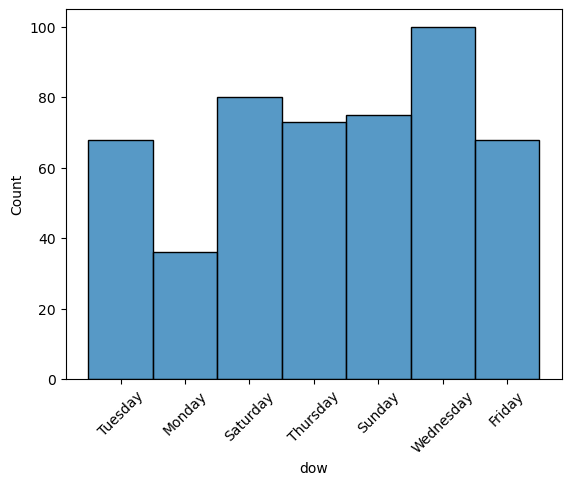

In [49]:
sns.histplot(tracks_df['dow'])
plt.xticks(rotation=45)

<Axes: xlabel='release_year', ylabel='Count'>

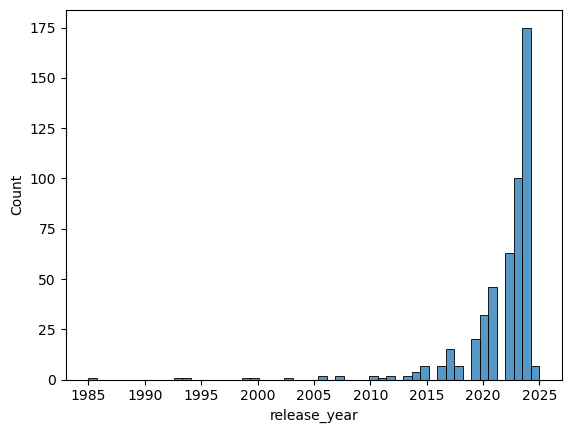

In [72]:
sns.histplot(merged_df['release_year'])

<Axes: xlabel='added_at_date', ylabel='popularity'>

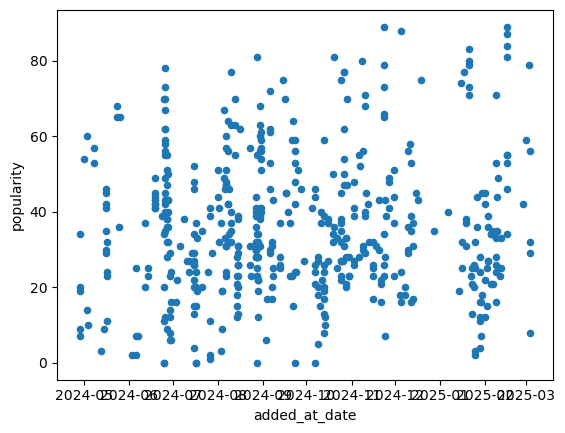

In [74]:
tracks_df.plot(y='popularity', x='added_at_date',kind='scatter')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'breakcore'),
  Text(1, 0, 'dubstep'),
  Text(2, 0, 'bass house'),
  Text(3, 0, 'drum and bass'),
  Text(4, 0, 'synthwave'),
  Text(5, 0, 'hyperpop'),
  Text(6, 0, 'future bass'),
  Text(7, 0, 'phonk'),
  Text(8, 0, 'k-pop'),
  Text(9, 0, 'speedcore'),
  Text(10, 0, 'riddim'),
  Text(11, 0, 'bass music'),
  Text(12, 0, 'soundtrack'),
  Text(13, 0, 'house'),
  Text(14, 0, 'edm'),
  Text(15, 0, 'electro swing')])

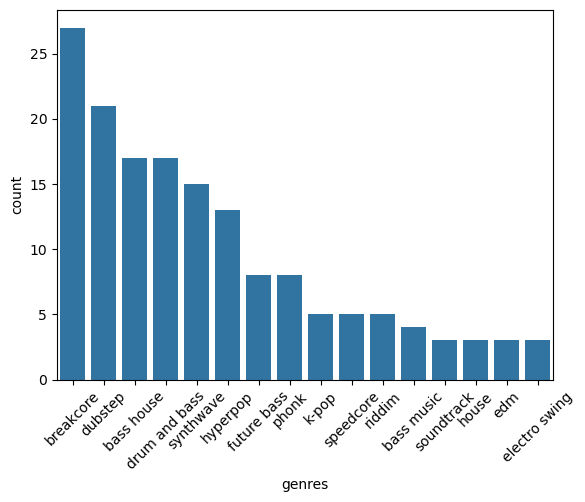

In [28]:
value_counts = artists_df['genres'].value_counts()
# filtered_genres = artists_df[artists_df['genres'].isin(value_counts[value_counts > 2].index)]
sns.barplot(value_counts[value_counts > 2])
plt.xticks(rotation=45)

TypeError: Invalid object type at position 0

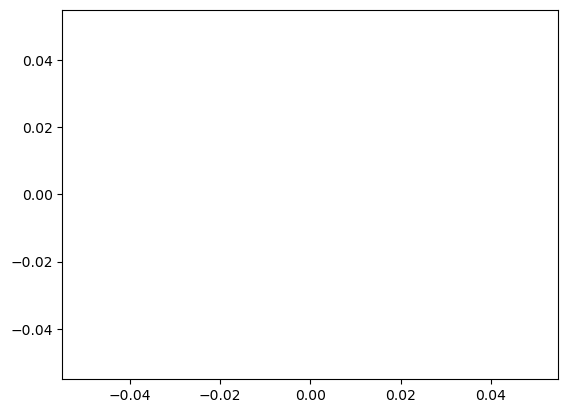

In [79]:
sns.histplot(merged_df['added_at_time'])

In [31]:
artist_counts = tracks_df['artist_name'].value_counts()
artist_counts

artist_name
Virtual Riot         17
REAPER               12
Charli xcx            9
Rezz                  8
Chappell Roan         7
                     ..
prod. DTM             1
Eddie EWI             1
BRVMES                1
aUtOdiDakT            1
Douglas Holmquist     1
Name: count, Length: 317, dtype: int64

<Axes: xlabel='popularity', ylabel='Count'>

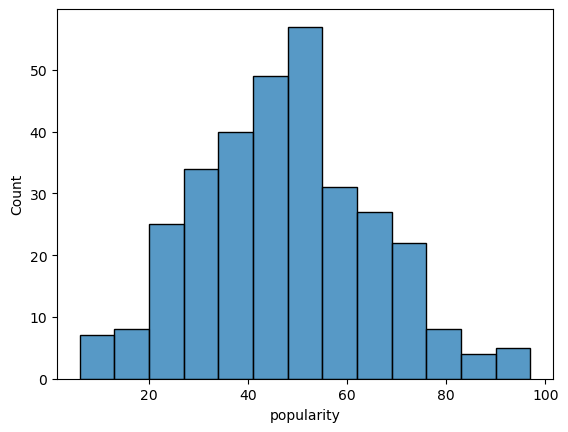

In [41]:
sns.histplot(artists_df['popularity'])

<Axes: xlabel='popularity', ylabel='Count'>

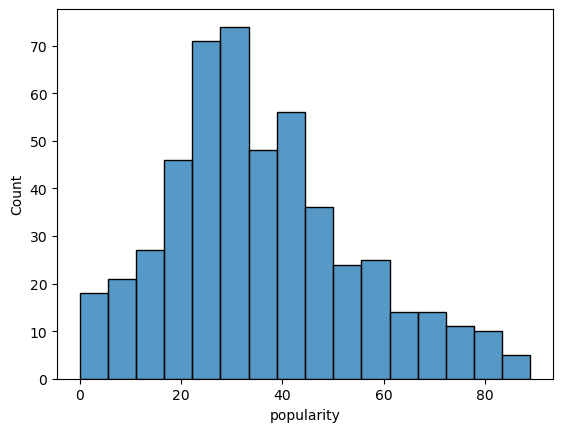

In [42]:
sns.histplot(tracks_df['popularity'])

<Axes: xlabel='duration', ylabel='track_popularity'>

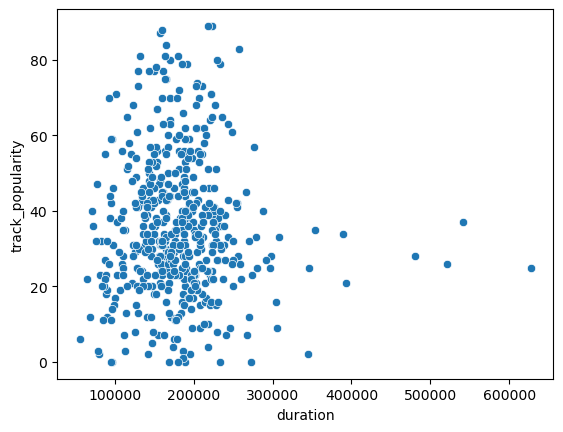

In [66]:
sns.scatterplot(data=merged_df, x='duration', y='track_popularity')